# <div style="direction: rtl"> תרגיל בית 3 חלק שני: סימולציה סטוכסטית</div> #

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## <div style="direction: rtl"> שאלה 1 </div> ##

<div style="direction: rtl"> שאלה 13.2 בספר <br> בתרגול בנינו סימולציה בו או הדמוגרפיה סטוכסטיות או הסביבה סטוכסטית: בשאלה זאת נבנה סימולציה בה גם הדמוגרפיה וגם הסביבה סטוכסטיים:
   אפשר לחשוב שבכל שנה פקטור הגדילה אקראי (למשל, בגלל שכמות המזון הזמינה משתנה, או שמזג האוויר יותר קיצוני) וגם גידול האוכלוסיה אקראי (כמות לידות ומיתות משתנות) 
</div>

<div style="direction: rtl">1. כתבו סימולציה לגידול אקספוננציאלי בה קצב הגידול בכל צעד זמן נובע מהתפלגות ברנולית (הטלת מטבע):
    $$ R\left(t\right)\sim\begin{cases} 1.5 & p=0.7 \\ 0.5 & q=0.3 \end{cases}$$
    והגידול עצמו נובע מהתפלגות פואסונית
    $$ N\left(t+1\right)\sim\text{Poi}\left[R\left(t\right)N\left(t\right)\right] $$
    עם אוכלוסייה התחלתית של $N\left(0\right)=10$ ל-$30$ צעדים. הכינו גרף של האוכלוסייה.
</div>

In [2]:
# create rng with seed value 111,222 (11_12_22)

In [3]:
# initialization


# loop
for i in range(30):
    ...

In [4]:
# plot

####  ####

<div>
    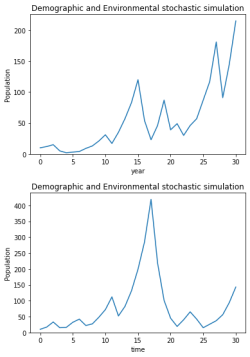
    <span style="direction: rtl; float: right">
    אמור לצאת גרף כמו אחד מאלה: <br> אנחנו רואים שהאוכלוסייה עולה ונופלת באופן די אקראי. <br> בשביל להבין מה קורה, אנחנו צריכים לקחת צבר. <br> 2. הריצו צבר של 500 סימולציות. <br> $\quad$ א. סרטטו את הריצות.<br>$\quad$ ב. חשבו כמה אחוז מהסימולציות הגיעו למצב הכחדה $N\left(30\right)=0$<br> $\quad$ ג. חשבו וציירו בגרף את אחוז ההכחדה בכל זמן $p_{exct}\left(t\right)=\frac{\#\left(N\left(t\right)==0\right)}{500}$. <br><br>
        בסוף, שמרו את צבר הסימולציות במשתנה שלא ידרס<br> (למשל, <code>Ns_uncorrelated</code>)
    </span>

In [5]:
# your code here.

<div style="direction: rtl">במציאות, מצב הסביבה בכל שנה הוא לא בלתי תלוי במה שהיה בשנה שעברה ובשנה הבאה: יש קורלציה, כך שאם השנה הייתה טובה, סביר שהשנה הבאה גם תהיה טובה, ואם השנה גרועה, סביר שגם השנה הבאה תהיה גרועה. <br> 3. נשתמש במודל חדש, בו ההסתברות ל-$R\left(t\right)$ תלויה בזמן הקודם.
    $$ R\left(t+1\right)\sim\begin{cases}
    R_g & p=0.85 & \text{ if }R\left(t\right)=R_g \\
    R_b & p=0.15 & \text{ if }R\left(t\right)=R_g \\
    R_g & p=0.35 & \text{ if }R\left(t\right)=R_b \\
    R_b & p=0.65 & \text{ if }R\left(t\right)=R_b
    \end{cases} $$
</div>

<div style="direction: rtl"> $\quad$ א. צרו פונקציה <code style="directin: ltr">next_R(r)</code> שלוקחת את ה-$R$ בזמן מסוים ונותנת $R$ חדש בהתאם לסיכויים שלמעלה: אם הסביבה טובה <code>R==1.5</code> נחזיר סביבה טובה בסיכוי $85\%$, ואם הסביבה רעה <code>R==0.5</code>, נחזיר סביבה טובה בסיכוי של $35\%$.
</div>

<div style="direction: rtl"> אפשר לעשות פונקציה חד מימדית (r הוא מספר והפונקציה משתמשת בהרבה ifים) ואפשר לעשות פונקציה מערכית (לוקחת r בתור מערך של הצבר ומשתמשת בהרבה np.where).
</div>

In [6]:
def next_R(r):
    """Get a random a new r with probabilities depending on the current r.

    85% 1.5 and 15% 0.5 if r==1.5
    35% 1.5 and 65% 0.5 if r==0.5
    """
    ...

<div style="direction: rtl">  ב. נשים לב שהסביבה לא תלויה בגודל האוכלוסייה. זה אומר שאפשר להגריל את <code>[...]Rs</code> מראש ולהשתמש בו אחר כך בסימולציה. <br>צרו מערך או רשימה עבור צבר של 500 סימולציות עם 31 ערכי $R$ לכל סימולציה באמצעות הפונקציה שכתבתם בסעיף א. התחילו בשנה טובה <code>Rs[0,:]=1.5</code> והוסיפו את שאר 30 הערכים בלולאה. אם ב-א. יצרתם פונקציה חד מימדית, תצטרכו גם לולאה לצבר
</div>

```python
Rs=np.zeros((31,500))
Rs[0,:]=1.5
for t in range(30):
    Rs[t+1,0]=...

# or if you made 1d function
for i in range(500):
    for t in range(30):
        Rs[t+1,i]=...
```

<div style="direction: rtl">ג. עם ערכי ה-R מוכנים, ייצרו סימולציה סטוכסטית בסביבה ובדמוגרפיה: צרו צבר של 500 סימולציות והתחילו באוכלוסייה בגודל <code>Ns[0,:]=10</code>, בכל שלב השתמשו באוכלוסייה וב-R והגרילו את האוכלוסייה בשלב הבא באמצעות התפלגות פואסון
    $$ N_i \left(t+1\right)\sim\text{Poi}\left\lbrack R_i\left(t\right) N_i\left(t\right)\right] $$
    והריצו ל-30 צעדי זמן. וודאו ש <code>R</code> הוא מערך numpy אם הוא עוד לא כזה <code>R=np.array(R)</code>.<br> שרטטו את גודל האוכלוסייה בסימולציות. 
</div>

<div style="direction: rtl">ד. חשבו וציירו את אחוז ההכחדה בזמן בסימולציה הזאת והסימולציה הקודמת (סעיף 2.). האם הקורלציה מעלה או מורידה את סיכויי ההשרדות לסימולציה הקודמת בה הסביבה נבחרה ללא תלות?<br> בתרגול ראינו סימולציה אקספוננציאלית סטוכסטית בדמוגרפיה בלבד: מה ההבדל בכמות האוכלוסייה הנכחדת?
</div>

<div style="direction: rtl">ה. שרטטו את גודל האוכלוסיה בזמן רק לסימולציות שנכחדו. 
</div>

In [7]:
# your code here